Version 1: Deutsch-Jozsa algorithm

- Def:
    The Jozsa algorithm is a quantum algorithm used to solve a specific problem related to oracle functions. In the case of Jozsa's problem, it determines whether an unknown binary function (oracle) is constant or balanced.

- Implementation: 
    Using Qiskit library of Python.


In [1]:
from qiskit import QuantumCircuit, transpile, execute, BasicAer
from qiskit.visualization import plot_histogram

In [2]:
from qiskit.visualization import plot_bloch_multivector, circuit_drawer

In [3]:
# Define the oracle for a constant function (0) or a balanced function (1)
def deutsch_jozsa_oracle(qc, f):
    if f == 1:
        qc.cx(0, 1)

In [4]:
# Create a quantum circuit with 2 qubits and 1 classical bit
n = 2
qc = QuantumCircuit(n, 1)

In [5]:
# Apply Hadamard gate to the first qubit
qc.h(0)

In [6]:
# Apply the Deutsch-Jozsa oracle for a balanced function
deutsch_jozsa_oracle(qc, 1)  # Change to 0 for a constant function

In [7]:
# Apply Hadamard gates to both qubits
qc.h(0)
qc.h(1)

In [8]:
# Measure the first qubit and store the result in the classical bit
qc.measure(0, 0)

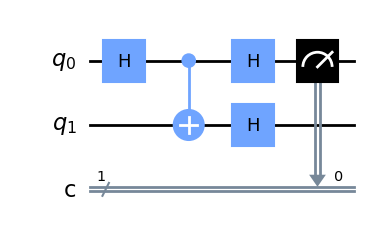

In [9]:
# Visualize the quantum circuit
circuit_drawer(qc, output='mpl')

In [10]:
# Simulate the circuit using the BasicAer simulator
simulator = BasicAer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
job = execute(compiled_circuit, simulator, shots=1024)
result = job.result()

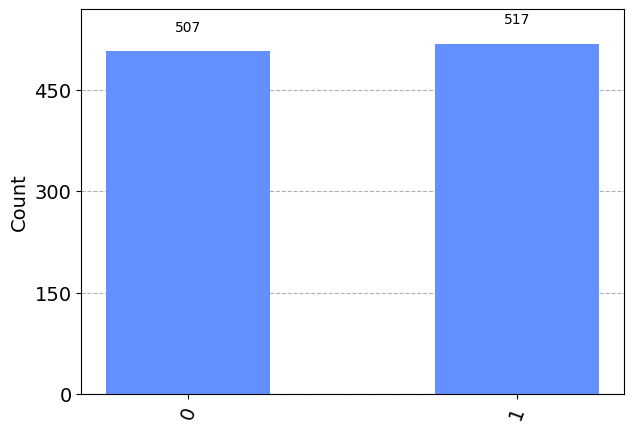

In [11]:
# Get and plot the measurement results
counts = result.get_counts()
plot_histogram(counts)